<a href="https://colab.research.google.com/github/sutummala/Fundus-Quality-Estimation/blob/main/DR_ImageQuality_EfficientNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 159452 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
!pip install vit-keras
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=940d3b078af93526ea58b84478fdfff6a3c07ba0d0ba55c4e77150c9e6bf724a
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.5 MB/s 


In [ ]:
!git clone https://github.com/rishigami/Swin-Transformer-TF.git

fatal: destination path 'Swin-Transformer-TF' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/Swin-Transformer-TF')
from swintransformer import SwinTransformer

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
#import tensorflow_addons as tfa
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from vit_keras import vit, utils, visualize

In [ ]:
def extract_data_and_lables(data_dir, data_):
  data = []
  image_labels =[]
  for folder in sorted(os.listdir(data_dir)):
    images = os.listdir(os.path.join(data_dir, folder))
    for info in range(np.shape(data_)[0]):
      if data_[info, 0] == int(folder):
        print(f'Doing for Subject ID: {int(folder)}, and Image:{data_[info, 1]}')
        if data_training[info, 1][-2]=='l':
          print(f'Subject ID: {int(folder)}, Image:{data_[info, 1]}, Image_label:{data_[info, 2]}')
          image_label = data_[info, 2]
        elif data_[info, 1][-2] == 'r':
          print(f'Subject ID: {int(folder)}, Image:{data_[info, 1]}, Image_label:{data_[info, 2]}')
          image_label = data_[info, 2]
    
        for image in images:
          if image[:-4]==data_[info, 1]:
            print(f'Match found {image[:-4]}, {data_[info, 1]}')
            image_data = cv2.imread(os.path.join(data_dir, folder, image))
            data.append(cv2.resize(image_data, (224, 224)))
            image_labels.append(image_label)
  return np.array(data), np.array(image_labels)

In [ ]:
data_dir_training = '/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/regular-fundus-training/Images'
data_dir_validation = '/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/regular-fundus-validation/Images'
data_dir_test = '/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/Online-Challenge1&2-Evaluation/Images'

In [ ]:
data_training_file = pd.read_csv('/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/regular-fundus-training/regular-fundus-training.csv')
data_validation_file = pd.read_csv('/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/regular-fundus-validation/regular-fundus-validation.csv')
data_test_file = pd.read_excel('/content/drive/MyDrive/Datasets/DeepDRiD-master/regular_fundus_images/Online-Challenge1&2-Evaluation/Challenge2_labels.xlsx')

In [ ]:
data_training=data_training_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()
data_validation=data_validation_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()
data_test=data_test_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()

In [ ]:
X_train, y_train = extract_data_and_lables(data_dir_training, data_training)
X_validation, y_validation = extract_data_and_lables(data_dir_validation, data_validation)
X_test, y_test = extract_data_and_lables(data_dir_test, data_test)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

Streaming output truncated to the last 5000 lines.
Subject ID: 174, Image:174_l1, Image_label:0
Match found 174_l1, 174_l1
Doing for Subject ID: 174, and Image:174_l2
Subject ID: 174, Image:174_l2, Image_label:0
Match found 174_l2, 174_l2
Doing for Subject ID: 174, and Image:174_r1
Subject ID: 174, Image:174_r1, Image_label:0
Match found 174_r1, 174_r1
Doing for Subject ID: 174, and Image:174_r2
Subject ID: 174, Image:174_r2, Image_label:0
Match found 174_r2, 174_r2
Doing for Subject ID: 175, and Image:175_l1
Subject ID: 175, Image:175_l1, Image_label:0
Match found 175_l1, 175_l1
Doing for Subject ID: 175, and Image:175_l2
Subject ID: 175, Image:175_l2, Image_label:0
Match found 175_l2, 175_l2
Doing for Subject ID: 175, and Image:175_r1
Subject ID: 175, Image:175_r1, Image_label:0
Match found 175_r1, 175_r1
Doing for Subject ID: 175, and Image:175_r2
Subject ID: 175, Image:175_r2, Image_label:0
Match found 175_r2, 175_r2
Doing for Subject ID: 176, and Image:176_l1
Subject ID: 176, Imag

In [ ]:
X_train = vit.preprocess_inputs(X_train)
X_validation = vit.preprocess_inputs(X_validation)
X_test = vit.preprocess_inputs(X_test)

In [ ]:
# Saving the data 
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_train.npy', X_train)
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_validation.npy', X_validation)
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_validation.npy', y_validation)
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_test.npy', X_test)
np.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_test.npy', y_test)

In [ ]:
# Loading the data
X_train = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_train.npy')
X_validation = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_validation.npy')
y_validation = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_validation.npy')
X_test = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Datasets/DeepDRiD-master/quality-DR/y_test.npy')

In [ ]:
IMAGE_SIZE = [224, 224, 3]
#NUM_CLASSES = len(np.unique(y_train))

#base_model = SwinTransformer('swin_base_224', include_top=False, pretrained=True)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = False)

model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

473176280/473176280 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 117,749,410
Trainable params: 117,236,834
Non-trainable params: 512,576
_________________________________________________________________


In [ ]:
start = 0
for layer in base_model.layers:
  start = start + 1
  if start >= int(0.5*(len(base_model.layers))):
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 117,749,410
Trainable params: 19,596,186
Non-trainable params: 98,153,224
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
IMAGE_SIZE = (224, 224, 3)

In [ ]:
def Ensemble_Model(IMAGE_SIZE):
    
    input = tf.keras.Input(IMAGE_SIZE)
    
    model = tf.keras.Sequential()
    
    base_model_s = tf.keras.applications.efficientnet_v2.EfficientNetV2S(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = False)
    base_model_m = tf.keras.applications.efficientnet_v2.EfficientNetV2M(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = False)
    base_model_l = tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = False)
    
    encoded_s = base_model_s(input)
    encoded_m = base_model_m(input)
    encoded_l = base_model_l(input)

    encoded_s_flat = tf.keras.layers.GlobalAveragePooling2D()(encoded_s)
    encoded_m_flat = tf.keras.layers.GlobalAveragePooling2D()(encoded_m)
    encoded_l_flat = tf.keras.layers.GlobalAveragePooling2D()(encoded_l)

    concatenation_layer = tf.keras.layers.Concatenate()([encoded_s_flat, encoded_m_flat, encoded_l_flat])

    dense_layer = tf.keras.layers.Dense(512, activation = 'leaky_relu', kernel_regularizer = 'L2')(concatenation_layer) # Added extra dense layer after ecodings comparison
    prediction = tf.keras.layers.Dense(2, activation='softmax')(dense_layer)

    ensemblenet = tf.keras.Model(inputs = input, outputs = prediction)
    
    return ensemblenet

In [ ]:
ensemble_model = Ensemble_Model(IMAGE_SIZE)
ensemble_model.summary()
#ensemble_model.build(IMAZE_SIZE)
ensemble_model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetv2-s (Functional)  (None, 7, 7, 1280)   20331360    ['input_24[0][0]']               
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['input_24[0][0]']               
                                                                                                  
 efficientnetv2-l (Functional)  (None, 7, 7, 1280)   117746848   ['input_24[0][0]']         

In [ ]:
start = 0
for layer in ensemble_model.layers:
  start = start + 1
  if start >= int(0.9*(len(ensemble_model.layers))):
    layer.trainable = False

In [ ]:
ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetv2-s (Functional)  (None, 7, 7, 1280)   20331360    ['input_24[0][0]']               
                                                                                                  
 efficientnetv2-m (Functional)  (None, 7, 7, 1280)   53150388    ['input_24[0][0]']               
                                                                                                  
 efficientnetv2-l (Functional)  (None, 7, 7, 1280)   117746848   ['input_24[0][0]']         

In [ ]:
ensemble_model.fit(X_train, y_train, batch_size = 8, epochs = 10, validation_split = 0.1)

In [ ]:
y_pred = ensemble_model.predict(X_validation)

In [ ]:
ensemble_model.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-ensemble(s,m,l)-224')

In [ ]:
model_s = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-s-224')
model_m = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-m-224')
model_l = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-l-224')

#model_b0 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b0-224')
#model_b1 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b1-224')
#model_b2 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b2-224')
#model_b3 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b3-224')


In [ ]:
#y_pred_b0 = model_b0.predict(X_test)
#y_pred_b1 = model_b1.predict(X_test)
#y_pred_b2 = model_b2.predict(X_test)
#y_pred_b3 = model_b3.predict(X_test)
y_pred_s = model_s.predict(X_test)
y_pred_m = model_m.predict(X_test)
y_pred_l = model_l.predict(X_test)

In [ ]:
y_pred = np.zeros(np.shape(y_pred_b0))

for i in range(len(y_validation)):
  y_pred[i, :] = (1/4)*(y_pred_b0[i, :] + y_pred_b1[i, :] + y_pred_b2[i, :] + y_pred_b3[i, :])

print(y_pred[0, :])

[0.47538841 0.52461159]


In [ ]:
y_pred = np.zeros(np.shape(y_pred_s))

for i in range(len(y_validation)):
  y_pred[i, :] = (1/3)*(y_pred_s[i, :] + y_pred_m[i, :] + y_pred_l[i, :])

print(y_pred[0, :])

[0.60507238 0.39492762]


In [ ]:
#y_pred = model.predict(X_validation)
y_prob = np.argmax(y_pred, axis = 1)

In [ ]:
import sklearn
import matplotlib.pyplot as plt

In [ ]:
multi_class = 0

In [ ]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_prob)}')

if multi_class:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob)
print(f'AUC is {AUC}')

if not multi_class:
  target_names = ['Bad', 'Good']
else:
  target_names = ['No-DR', 'NPDR-1', 'NPDR-2', 'NPDR-3', 'PDR']

print('F1-score', sklearn.metrics.f1_score(y_test, y_prob, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_prob)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_prob)}')
print(f'{sklearn.metrics.classification_report(y_test, y_prob, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.75
AUC is 0.748989898989899
F1-score 0.7503210697287903
Balanced accuracy 0.748989898989899
MCC 0.496702057353863
              precision    recall  f1-score   support

         Bad       0.78      0.76      0.77       220
        Good       0.72      0.74      0.73       180

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



[[0.75909091 0.24090909]
 [0.26111111 0.73888889]]


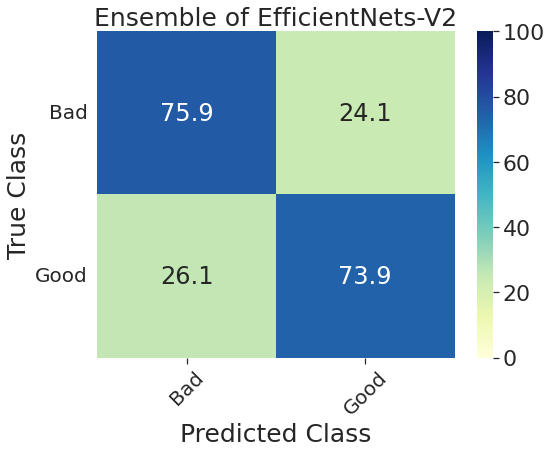

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_prob, normalize = 'true')
#confusion_mat[1, 0] = 6
#confusion_mat[1, 1] = 296
if multi_class:
  class_names = ['No-DR', 'NPDR-mild', 'NPDR-moderate', 'NPDR-severe', 'PDR']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if multi_class:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=25)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=25)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('Ensemble of EfficientNets-V2', fontsize=25)

plt.show()